In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Data

In [2]:
df = pd.read_csv("timeseries100.csv")
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.014493,-0.043478,-0.053435,-0.095057,-0.114390,-0.018587,0.003984,-0.152540,-0.133550,-0.065041,...,-0.086486,-0.049869,-0.043257,-0.093750,-0.083770,-0.083770,-0.078125,-0.073791,-0.060000,-0.054187
1,-0.068702,-0.028807,-0.008130,-0.016393,0.029536,0.003984,0.031746,-0.015267,-0.007812,-0.011858,...,0.029630,-0.028369,-0.013699,0.009346,0.026549,0.056000,0.017544,-0.053659,-0.027431,0.011321
2,-0.068702,-0.028807,-0.008130,-0.016393,0.029536,0.003984,0.031746,-0.015267,-0.007812,-0.011858,...,0.029630,-0.028369,-0.013699,0.009346,0.026549,0.056000,0.017544,-0.053659,-0.027431,0.011321
3,-0.428570,-0.369230,-0.415490,-0.368820,-0.346460,-0.373580,-0.346460,-0.460000,-0.425610,-0.431510,...,-0.218880,-0.196510,-0.231400,-0.230090,-0.192660,-0.227470,-0.330830,-0.312980,-0.250000,-0.215190
4,-0.015748,0.004049,0.015748,0.033708,0.043478,-0.011583,-0.042017,-0.012766,-0.021097,-0.008547,...,0.083333,0.080537,0.096774,0.087838,0.091549,0.105260,0.076412,0.077922,0.068404,0.064103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.133080,0.082278,0.034700,0.211010,0.080702,0.081678,0.022422,0.041176,0.017370,0.106560,...,0.030303,0.312140,0.000000,0.000000,0.078224,0.000000,0.089744,0.113540,0.139320,0.051546
214,0.043796,0.027237,0.063197,0.085502,0.079848,0.066148,0.053030,0.045802,0.064639,0.074205,...,-0.114190,-0.100370,-0.115940,-0.107270,-0.104170,-0.101050,-0.089552,-0.062731,-0.007692,0.053435
215,0.077307,0.047146,0.073569,0.074468,0.027295,0.080000,0.231830,0.015801,0.035800,0.011601,...,0.065693,0.328300,0.092348,0.015590,0.042453,0.015521,0.030733,0.047859,0.111750,0.104380
216,0.043732,0.034091,0.017143,0.026239,0.029316,0.021978,0.083871,0.010989,0.017045,0.014409,...,-0.028037,0.024561,0.017668,0.010601,0.011407,0.033333,0.043103,-0.009009,-0.008772,-0.034146


In [3]:
closeData = df.loc[0].values.astype('float32')

total_rows = closeData.shape[0]
train_end = int(total_rows * 0.7)
validation_end = int(total_rows * 0.9)

XTrain = closeData[:train_end]
XValidation = closeData[train_end:validation_end]
XTest = closeData[validation_end:]

print("Training set size:", len(XTrain), f"({len(XTrain)/len(closeData)*100}%)")
print("Validation set size:", len(XValidation), f"({len(XValidation)/len(closeData)*100}%)")
print("Test set size:", len(XTest), f"({len(XTest)/len(closeData)*100}%)")

Training set size: 70 (70.0%)
Validation set size: 20 (20.0%)
Test set size: 10 (10.0%)


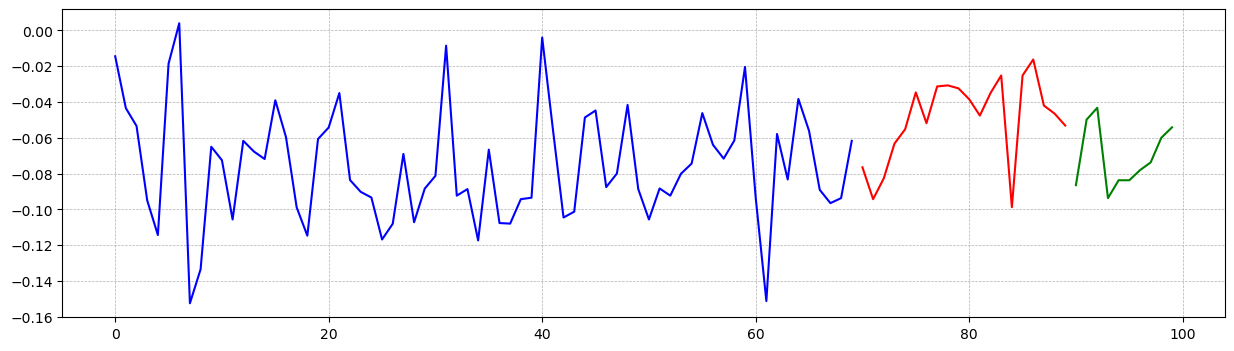

In [4]:
plt.figure(figsize=(15,4))

# plt.plot(openData, color='gray')
plt.plot(XTrain, color='blue')
plt.plot(np.arange(len(XTrain), len(XTrain) + len(XValidation)), XValidation, color='red')
plt.plot(np.arange(len(XTrain) + len(XValidation), len(XTrain) + len(XValidation) + len(XTest)), XTest, color='green')

plt.grid(linestyle = '--', linewidth = 0.5)
plt.show() 

## Processing data

In [5]:
closeData.shape

(100,)

In [6]:
closeData = closeData.reshape(-1,1)
XTrain = XTrain.reshape(-1,1)
XValidation = XValidation.reshape(-1,1)
XTest = XTest.reshape(-1,1)

# scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = StandardScaler()
scaler.fit(closeData)

openData = scaler.transform(closeData)
XTrain = scaler.transform(XTrain)
XValidation = scaler.transform(XValidation)
XTest = scaler.transform(XTest)

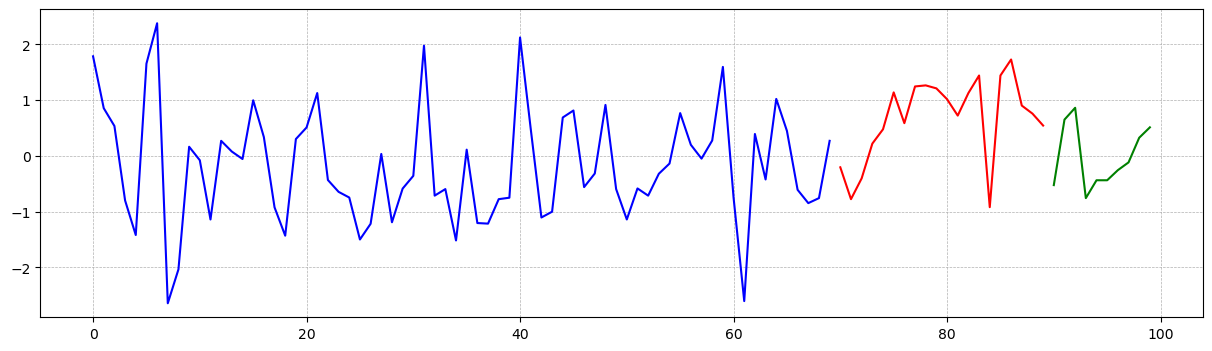

In [7]:
plt.figure(figsize=(15,4))

plt.plot(XTrain, color='blue')
plt.plot(np.arange(len(XTrain), len(XTrain) + len(XValidation)), XValidation, color='red')
plt.plot(np.arange(len(XTrain) + len(XValidation), len(XTrain) + len(XValidation) + len(XTest)), XTest, color='green')

plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

# Many-to-one

In [8]:
def create_lookback(dataset, lookback, device):
    X, y = [], []
    for i in range(len(dataset) - lookback):
        window = dataset[i:(i + lookback)]
        after_window = dataset[i + lookback]
        X.append(window)
        y.append(after_window)
    X_tensor = torch.tensor(np.array(X), dtype=torch.float32).to(device)
    y_tensor = torch.tensor(np.array(y), dtype=torch.float32).to(device)
    return X_tensor, y_tensor

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [15]:
lookback = 18
XTrain_tensor, TTrain_tensor = create_lookback(XTrain, lookback, device)
XValidation_tensor, TValidation_tensor = create_lookback(XValidation, lookback, device)
XTest_tensor, TTest_tensor = create_lookback(XTest, lookback, device)

Timeseries_tensor, TTimeseries_tensor = create_lookback(openData, lookback, device)

print(f"XTrain_tensor shape: {XTrain_tensor.shape}, \nTTrain_tensor shape: {TTrain_tensor.shape}")
print(f"\nXValidation_tensor shape: {XValidation_tensor.shape}, \nTValidation_tensor shape: {TValidation_tensor.shape}")
print(f"\nXTest_tensor shape: {XTest_tensor.shape}, \nTTest_tensor shape: {TTest_tensor.shape}")

XTrain_tensor shape: torch.Size([52, 18, 1]), 
TTrain_tensor shape: torch.Size([52, 1])

XValidation_tensor shape: torch.Size([2, 18, 1]), 
TValidation_tensor shape: torch.Size([2, 1])

XTest_tensor shape: torch.Size([0]), 
TTest_tensor shape: torch.Size([0])


In [16]:
train_dataset = TensorDataset(XTrain_tensor, TTrain_tensor)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)

val_dataset = TensorDataset(XValidation_tensor, TValidation_tensor)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)

test_dataset = TensorDataset(XTest_tensor, TTest_tensor)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

print(len(train_loader))
print(len(val_loader))
print(len(test_loader))

52
2
0


In [ ]:
class LSTMModel(nn.Module):
    def __init__(self):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=64, batch_first=True)
        self.dropout = nn.Dropout(0.2)
        self.fc1 = nn.Linear(64, 16)
        self.fc2 = nn.Linear(16, 1)

    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.dropout(x[:, -1, :])
        x = self.fc1(x)
        x = self.fc2(x)
        return x

class GRUModel(nn.Module):
    def __init__(self):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size=1, hidden_size=32, batch_first=True)
        self.dropout = nn.Dropout(0.2)
        self.fc1 = nn.Linear(32, 16)
        self.fc2 = nn.Linear(16, 1)

    def forward(self, x):
        x, _ = self.gru(x)
        x = self.dropout(x[:, -1, :])
        x = self.fc1(x)
        x = self.fc2(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
learning_rate = 0.001
n_epochs = 100


model_lstm = LSTMModel().to(device)
optimizer_lstm = optim.Adam(model_lstm.parameters(), lr=learning_rate)
loss_fn = nn.MSELoss()

model_gru = GRUModel().to(device)
optimizer_gru = optim.Adam(model_gru.parameters(), lr=learning_rate)


train_hist_lstm, val_hist_lstm = [], []
train_hist_gru, val_hist_gru = [], []


def calculate_rmse(predicted, observed):
    rmses = np.sqrt(np.mean((predicted - observed) ** 2, axis=0))
    rmse_mean = np.mean(rmses)
    return rmse_mean, rmses


min_val_loss_lstm = float('inf')
early_stop_count_lstm = 0

for epoch in range(n_epochs):
    model_lstm.train()
    total_loss_lstm = 0.0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        optimizer_lstm.zero_grad()
        y_pred = model_lstm(X_batch)
        
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer_lstm.step()
        
        total_loss_lstm += loss.item()

    average_loss_lstm = total_loss_lstm / len(train_loader)
    train_hist_lstm.append(average_loss_lstm)

    model_lstm.eval()
    total_val_loss_lstm = 0.0
    y_predicted_lstm, y_observed_lstm = [], []

    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            
            y_pred = model_lstm(X_batch)
            y_predicted_lstm.append(y_pred.cpu().numpy())
            y_observed_lstm.append(y_batch.cpu().numpy())
            
            val_loss = loss_fn(y_pred, y_batch)
            total_val_loss_lstm += val_loss.item()

    average_val_loss_lstm = total_val_loss_lstm / len(val_loader)
    val_hist_lstm.append(average_val_loss_lstm)

model_lstm.eval()
with torch.no_grad():
    y_pred_test_lstm = model_lstm(Timeseries_tensor)

predicted_lstm = scaler.inverse_transform(y_pred_test_lstm.cpu().numpy())
observed = scaler.inverse_transform(TTimeseries_tensor.cpu().numpy())
rmse_mean_lstm, rmses_lstm = calculate_rmse(predicted_lstm, observed)
print(f"RMSE promedio LSTM: {rmse_mean_lstm}")


min_val_loss_gru = float('inf')
early_stop_count_gru = 0

for epoch in range(n_epochs):
    model_gru.train()
    total_loss_gru = 0.0
    
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        optimizer_gru.zero_grad()
        y_pred = model_gru(X_batch)
        
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer_gru.step()
        
        total_loss_gru += loss.item()

    average_loss_gru = total_loss_gru / len(train_loader)
    train_hist_gru.append(average_loss_gru)

    model_gru.eval()
    total_val_loss_gru = 0.0
    y_predicted_gru, y_observed_gru = [], []

    # with torch.no_grad():
    #     for X_batch, y_batch in val_loader:
    #         X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            
    #         y_pred = model_gru(X_batch)
    #         y_predicted_gru.append(y_pred.cpu().numpy())
    #         y_observed_gru.append(y_batch.cpu().numpy())
            
    #         val_loss = loss_fn(y_pred, y_batch)
    #         total_val_loss_gru += val_loss.item()

    # average_val_loss_gru = total_val_loss_gru / len(val_loader)
    # val_hist_gru.append(average_val_loss_gru)

model_gru.eval()
with torch.no_grad():
    y_pred_test_gru = model_gru(Timeseries_tensor)

predicted_gru = scaler.inverse_transform(y_pred_test_gru.cpu().numpy())
rmse_mean_gru, rmses_gru = calculate_rmse(predicted_gru, observed)
print(f"RMSE promedio GRU: {rmse_mean_gru}")


RMSE promedio LSTM: 0.031478624790906906
RMSE promedio GRU: 0.049807775765657425


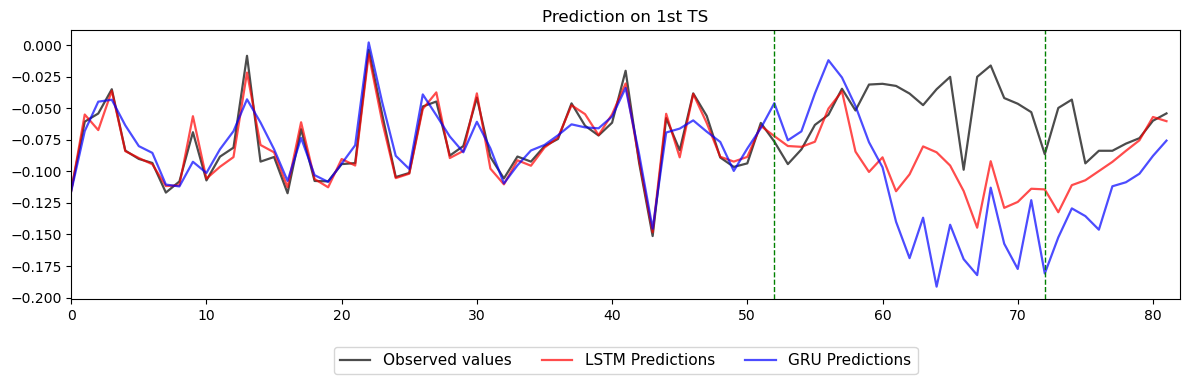

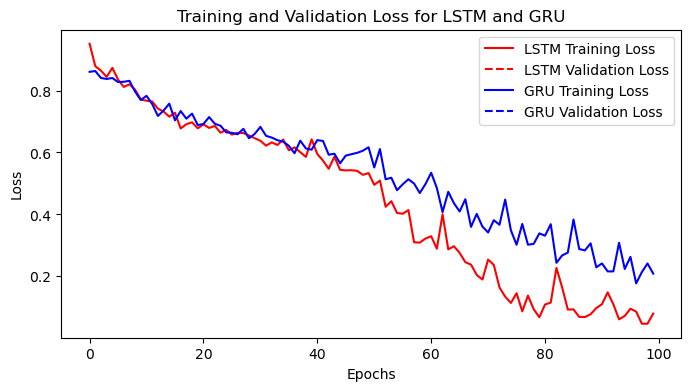

In [22]:
# Gráficas de comparación de funciones de pérdida y predicciones
plt.figure(figsize=(12, 4))
plt.plot(observed, color='k', linewidth=1.6, alpha=.7, label='Observed values')
plt.plot(predicted_lstm, label='LSTM Predictions', linestyle='-', color="red", linewidth=1.6, alpha=0.7)
plt.plot(predicted_gru, label='GRU Predictions', linestyle='-', color="blue", linewidth=1.6, alpha=0.7)

plt.axvline(x=len(XTrain)-lookback, color='green', linestyle='--', linewidth=1)
plt.axvline(x=len(XTrain)+len(XValidation)-lookback, color='green', linestyle='--', linewidth=1)

plt.xlim(0, len(XTrain) + len(XValidation) + len(XTest) - lookback)
plt.title('Prediction on 1st TS')
plt.legend(fontsize=11, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
# plt.grid(linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(train_hist_lstm, label='LSTM Training Loss', color='red')
plt.plot(val_hist_lstm, label='LSTM Validation Loss', color='red', linestyle='--')
plt.plot(train_hist_gru, label='GRU Training Loss', color='blue')
plt.plot(val_hist_gru, label='GRU Validation Loss', color='blue', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for LSTM and GRU')
plt.legend()
# plt.grid(True)
plt.show()